In [3]:
import pandas as pd 
import re 
import string 
import nltk
import simplemma
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import numpy as np

In [4]:
#Lettura Dataset
df = pd.read_json("finale2.json ", lines = 'True', orient = 'records')

ValueError: Expected object or value

In [20]:
df = df.drop(df[df['rating'] == 0].index)

In [21]:
df = df.dropna(subset=['rating'])
df = df.dropna(subset=['review'])

In [22]:
df['rating'] = df['rating'].astype(int)

In [27]:
df

,restaurant_name,rating,quote,review,number
0,Bufalero,5,Carne top e personale eccellente,Carne spettacolare. Abbiamo provato Galiziana ...,NaN
1,Bufalero,5,posto super consigliato,"Cibo ottimo e personale di sala gentilissimo, ...",NaN
2,Bufalero,5,Aspettative più che soddisfatte: carni e cottu...,"Tutto perfetto,\ncomplimenti al servizio di Lu...",NaN
3,Bufalero,5,"Alte aspettative riservato, servizio top","Tutto perfetto, nota di merito al servizio di ...",NaN
4,Bufalero,5,Ottima cena!!,Siamo andati al bufalero e per aspettare per m...,NaN
...,...,...,...,...,...
376268,Hachi Ristorante Giapponese,5,Ottimo ristorante,"Il ristorante ha una bella atmosfera, il cibo ...",NaN
376269,Hachi Ristorante Giapponese,5,Cibo ottimo servizio super n,Abbiamo ordinato mix tempura e spaghettini con...,NaN
376270,Hachi Ristorante Giapponese,5,Best sushi in Napoli!,Cesare & Chef Leonardo ha fatto un ottimo lavo...,NaN
376271,Hachi Ristorante Giapponese,5,Amore Ogni Visita,Ho devo dire... questo posto è superlativo. St...,NaN


In [23]:
df_5_stars = df.loc[df["rating"] == 5]

In [24]:
df_5_stars

,restaurant_name,rating,quote,review,number
0,Bufalero,5,Carne top e personale eccellente,Carne spettacolare. Abbiamo provato Galiziana ...,NaN
1,Bufalero,5,posto super consigliato,"Cibo ottimo e personale di sala gentilissimo, ...",NaN
2,Bufalero,5,Aspettative più che soddisfatte: carni e cottu...,"Tutto perfetto,\ncomplimenti al servizio di Lu...",NaN
3,Bufalero,5,"Alte aspettative riservato, servizio top","Tutto perfetto, nota di merito al servizio di ...",NaN
4,Bufalero,5,Ottima cena!!,Siamo andati al bufalero e per aspettare per m...,NaN
...,...,...,...,...,...
376267,Hachi Ristorante Giapponese,5,"Ottimo cibo, ottimo servizio..Viviana per il p...",Potrebbe essere troppo..ma per noi è il miglio...,NaN
376268,Hachi Ristorante Giapponese,5,Ottimo ristorante,"Il ristorante ha una bella atmosfera, il cibo ...",NaN
376269,Hachi Ristorante Giapponese,5,Cibo ottimo servizio super n,Abbiamo ordinato mix tempura e spaghettini con...,NaN
376270,Hachi Ristorante Giapponese,5,Best sushi in Napoli!,Cesare & Chef Leonardo ha fatto un ottimo lavo...,NaN


In [28]:
#Rimozione di recensioni da 5 stelle per quilibrare il dataset
drop_indices = np.random.choice(df_5_stars.index, 229497, replace=False)
df_5_stars = df_5_stars.drop(drop_indices)

In [29]:
df_4_stars = df.loc[df["rating"] == 4]

In [30]:
df_4_stars

,restaurant_name,rating,quote,review,number
14,Quel Che C'è Laboratorio di Cucina,4,UNA CHICCA !,Luca e Tiziana sono due artisti ... non solo d...,NaN
22,Bono Bottega Nostrana - San Pietro,4,Panini molto buoni a due passi da San Pietro,Antipasto molto buono con ingredienti di quali...,NaN
44,Maison Bretonne,4,Very good,Locale carino e alla mano. Fantastica la possi...,40.0
45,Maison Bretonne,4,Very good,Ottimo posto per chi ricerca qualche cosa di n...,40.0
46,Maison Bretonne,4,Very good,Locale accogliente dove poter assaporare le sq...,40.0
...,...,...,...,...,...
376251,Hachi Ristorante Giapponese,4,Ottima qualita',Ho pranzato al Ristorante Giapponese Hachi e d...,NaN
376255,Hachi Ristorante Giapponese,4,Bel posto,Il cibo era buono anche il posto sembra molto ...,NaN
376256,Hachi Ristorante Giapponese,4,Napoli non è solo pizza!!!!,Dopo aver pizza di degustazione di Napoli erav...,NaN
376260,Hachi Ristorante Giapponese,4,Buon ristorante di sushi,"Io non sono un grande amante di Sushi, ma i mi...",NaN


In [ ]:
df_3_stars = df.loc[df["rating"] == 3]
df_3_stars

In [ ]:
df_2_stars = df.loc[df["rating"] == 2]
df_2_stars

In [ ]:
df_1_stars = df.loc[df["rating"] == 1]
df_1_stars

In [31]:
#Rimozione di recensioni da 4 stelle per quilibrare il dataset
drop_indices = np.random.choice(df_4_stars.index, 66195, replace=False)
df_4_stars = df_4_stars.drop(drop_indices)

In [32]:
df = df.drop(df[df['rating'] == 5].index)
df = df.drop(df[df['rating'] == 4].index)

In [33]:
frames = [df, df_4_stars, df_5_stars]

In [34]:
df = pd.concat(frames)

In [35]:
del df_5_stars
del df_4_stars

In [36]:
df.drop('number', inplace=True, axis=1)

In [37]:
df = df.reset_index()

In [38]:
df.drop('index', inplace=True, axis=1)

In [39]:
#Salvo in memoria la versione bilanciata del dataset, da usare successivamente con il classificatore Naive Bayes
df.to_csv('dataset.csv')

In [40]:
df

,restaurant_name,rating,quote,review
0,Maison Bretonne,1,Awful,Delusione per la qualità degli ingredienti. Se...
1,Maison Bretonne,1,Awful,"galettes veramente cattive, bruciate e dure. p..."
2,Maison Bretonne,3,Average,Mi aspettavo qualcosa di meglio. La qualità er...
3,Maison Bretonne,3,Good,Gallette molto buone . Cidro bretone e buon vi...
4,Komenn Thai,3,Average,"Serata un po' così così, Non sono stati organi..."
...,...,...,...,...
80095,Hachi Ristorante Giapponese,5,Una seconda possibilita',Sono tornato recentemente a mangiare in questo...
80096,Hachi Ristorante Giapponese,5,Il migliore,Hachi a parer mio è il migliore ristorante gia...
80097,Hachi Ristorante Giapponese,5,Il miglior sushi provato finora in questa città!,"affenzionato a Jap One,incuriosito dalle voci ..."
80098,Hachi Ristorante Giapponese,5,Formula all you can eat!!,Che dire abbiamo provato di tutto quasi tutto!...


In [41]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

In [42]:
pd.options.display.max_rows = 290

In [43]:
null_rows

,restaurant_name,rating,quote,review
2667,None,3,Cena bich,Trancio di pesce spada con verdure grigliate a...
3049,None,2,È finito,Ho mangiato un piatto di paccheri molti dei qu...
3679,None,3,Serata no?,Locale ben recensito e con menù invitante. Ric...
3680,None,3,"Buono, senza particolari emozioni","Location bella, posto intimo. Rapporto qualità..."
4671,None,3,In super velocità!,Locale piccolino con tre tavoli da due all’int...
...,...,...,...,...
78253,None,5,Delizioso!!,Ci siamo capitati al Cangrande senza conoscere...
78326,None,5,Ristorante con il clima siciliano,Ristorante dove si respira il clima siciliano ...
78452,None,5,Super cena !!!,Girando x la Sicilia la sera del 1gennaio ho c...
79300,None,5,VERAMENTE ...ALLA GRANDE!!!!!!!,Siamo stati ieri sera per cena a questo locale...


In [44]:
stopwords = nltk.corpus.stopwords.words('italian')

In [45]:
#Creazione di un corpus con testo pulito
corpus = []
for i in range(0, len(df)):
    if(i%2500==0):
        print(i)
    review = re.sub(r'[^\w\s]', ' ', str(df['review'][i]))
    review = re.sub(r'\s{2,}', ' ', review)
    review = review.lower()
    review = review.split()
    review = [simplemma.lemmatize(word, lang='it') for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    corpus.append(review)

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500
30000
32500
35000
37500
40000
42500
45000
47500
50000
52500
55000
57500
60000
62500
65000
67500
70000
72500
75000
77500
80000


In [46]:
#Divisione del dataset in recensioni positive e ngative
df.loc[df["rating"] < 4, "rating"] = 0
df.loc[df["rating"] >= 4, "rating"] = 1

In [47]:
df = df.astype({'rating':'int'})

In [48]:
df

,restaurant_name,rating,quote,review
0,Maison Bretonne,0,Awful,Delusione per la qualità degli ingredienti. Se...
1,Maison Bretonne,0,Awful,"galettes veramente cattive, bruciate e dure. p..."
2,Maison Bretonne,0,Average,Mi aspettavo qualcosa di meglio. La qualità er...
3,Maison Bretonne,0,Good,Gallette molto buone . Cidro bretone e buon vi...
4,Komenn Thai,0,Average,"Serata un po' così così, Non sono stati organi..."
...,...,...,...,...
80095,Hachi Ristorante Giapponese,1,Una seconda possibilita',Sono tornato recentemente a mangiare in questo...
80096,Hachi Ristorante Giapponese,1,Il migliore,Hachi a parer mio è il migliore ristorante gia...
80097,Hachi Ristorante Giapponese,1,Il miglior sushi provato finora in questa città!,"affenzionato a Jap One,incuriosito dalle voci ..."
80098,Hachi Ristorante Giapponese,1,Formula all you can eat!!,Che dire abbiamo provato di tutto quasi tutto!...


In [49]:
#Vettorizzazione delle recensioni in base al conteggio delle parole

cv = CountVectorizer(max_features = 2000)

X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [50]:
del corpus

In [51]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [52]:
del df

In [53]:
#Split in treaining e test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60075, 2000)
(60075,)
(20025, 2000)
(20025,)


In [54]:
#Testing su un classificatore di base

base_classifier = RandomForestClassifier(n_estimators = 10, random_state = 7, criterion = 'entropy', verbose=3)
base_classifier.fit(X_train, y_train)
end_time = time.time()
y_pred = base_classifier.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [55]:
accuracy_score(y_test, y_pred)

0.7842197253433209

In [56]:
confusion_matrix(y_test, y_pred)

array([[8317, 1631],
       [2690, 7387]])

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

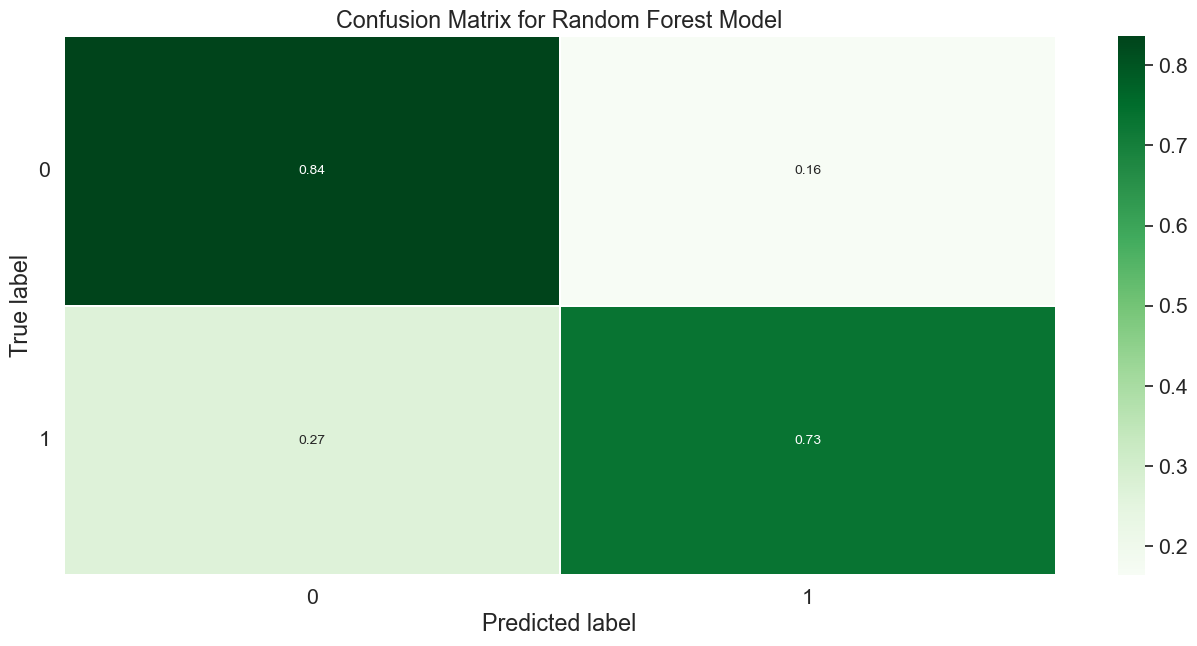

In [57]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['0', '1']
tick_marks = np.arange(len(class_names)) +0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79      9948
           1       0.82      0.73      0.77     10077

    accuracy                           0.78     20025
   macro avg       0.79      0.78      0.78     20025
weighted avg       0.79      0.78      0.78     20025



In [59]:
data = {'actual': y_test,
        'predicted': y_pred}

In [60]:
predicted = pd.DataFrame(data)

In [61]:
pd.options.display.max_rows = 44444

In [62]:
predicted

,actual,predicted
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,1,0
8,1,1
9,1,1


In [63]:
#Parametri di tuning per la randomized grid search
tuning_params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [2, 5, 10, 20, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [30]:
estimator = RandomForestClassifier()

In [55]:
rf_random = RandomizedSearchCV(estimator = estimator, param_distributions = tuning_params, n_iter = 100, cv = 3, verbose=10, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START bootstrap=True, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5
[CV 1/3; 1/100] END bootstrap=True, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.776 total time=   1.4s
[CV 2/3; 1/100] START bootstrap=True, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5
[CV 2/3; 1/100] END bootstrap=True, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.781 total time=   1.1s
[CV 3/3; 1/100] START bootstrap=True, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5
[CV 3/3; 1/100] END bootstrap=True, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimato

[CV 3/3; 9/100] END bootstrap=False, criterion=log_loss, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=nan total time=   0.1s
[CV 1/3; 10/100] START bootstrap=True, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 1/3; 10/100] END bootstrap=True, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.782 total time=  29.0s
[CV 2/3; 10/100] START bootstrap=True, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 2/3; 10/100] END bootstrap=True, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.784 total time=  28.9s
[CV 3/3; 10/100] START bootstrap=True, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 3/3; 1

[CV 1/3; 18/100] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=nan total time=   0.3s
[CV 2/3; 18/100] START bootstrap=False, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 2/3; 18/100] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=nan total time=   0.1s
[CV 3/3; 18/100] START bootstrap=False, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 3/3; 18/100] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=nan total time=   0.1s
[CV 1/3; 19/100] START bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=5
[CV 1/3; 19/100]

[CV 2/3; 26/100] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.783 total time=   2.7s
[CV 3/3; 26/100] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 3/3; 26/100] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.779 total time=   2.7s
[CV 1/3; 27/100] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 1/3; 27/100] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=nan total time=   0.2s
[CV 2/3; 27/100] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/3; 27/100] E

[CV 1/3; 35/100] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.805 total time=  13.7s
[CV 2/3; 35/100] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 35/100] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.807 total time=  13.5s
[CV 3/3; 35/100] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 35/100] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.803 total time=  13.4s
[CV 1/3; 36/100] START bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/3; 36/100] END boo

[CV 3/3; 43/100] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.805 total time=  41.1s
[CV 1/3; 44/100] START bootstrap=True, criterion=log_loss, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/3; 44/100] END bootstrap=True, criterion=log_loss, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=nan total time=   0.2s
[CV 2/3; 44/100] START bootstrap=True, criterion=log_loss, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/3; 44/100] END bootstrap=True, criterion=log_loss, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=nan total time=   0.1s
[CV 3/3; 44/100] START bootstrap=True, criterion=log_loss, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/3; 

[CV 3/3; 52/100] END bootstrap=False, criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=nan total time=   0.1s
[CV 1/3; 53/100] START bootstrap=True, criterion=log_loss, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/3; 53/100] END bootstrap=True, criterion=log_loss, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3; 53/100] START bootstrap=True, criterion=log_loss, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/3; 53/100] END bootstrap=True, criterion=log_loss, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=nan total time=   0.1s
[CV 3/3; 53/100] START bootstrap=True, criterion=log_loss, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/3; 53/100]

[CV 3/3; 61/100] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=nan total time=   0.1s
[CV 1/3; 62/100] START bootstrap=True, criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/3; 62/100] END bootstrap=True, criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.804 total time=  10.0s
[CV 2/3; 62/100] START bootstrap=True, criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/3; 62/100] END bootstrap=True, criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.804 total time=  10.1s
[CV 3/3; 62/100] START bootstrap=True, criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/3; 62/

[CV 3/3; 70/100] END bootstrap=True, criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=nan total time=   0.1s
[CV 1/3; 71/100] START bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 1/3; 71/100] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.799 total time= 1.2min
[CV 2/3; 71/100] START bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 2/3; 71/100] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.802 total time= 1.2min
[CV 3/3; 71/100] START bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 3/3; 71/100] END bootstrap

[CV 3/3; 79/100] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.1s
[CV 1/3; 80/100] START bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/3; 80/100] END bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.807 total time=  31.8s
[CV 2/3; 80/100] START bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 2/3; 80/100] END bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.806 total time=  32.0s
[CV 3/3; 80/100] START bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/3; 8

[CV 2/3; 88/100] END bootstrap=True, criterion=gini, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.810 total time=  22.5s
[CV 3/3; 88/100] START bootstrap=True, criterion=gini, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/3; 88/100] END bootstrap=True, criterion=gini, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.804 total time=  21.7s
[CV 1/3; 89/100] START bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/3; 89/100] END bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.4s
[CV 2/3; 89/100] START bootstrap=False, criterion=log_loss, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/3; 

[CV 1/3; 97/100] END bootstrap=False, criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=nan total time=   0.1s
[CV 2/3; 97/100] START bootstrap=False, criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10
[CV 2/3; 97/100] END bootstrap=False, criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=nan total time=   0.1s
[CV 3/3; 97/100] START bootstrap=False, criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10
[CV 3/3; 97/100] END bootstrap=False, criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=nan total time=   0.1s
[CV 1/3; 98/100] START bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 1/3; 98/100] END bootstrap=False

/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
144 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Use

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [2, 5, 10, 20, 50, 100,
                                                         200, 500]},
                   random_state=42, verbose=10)

In [56]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'criterion': 'entropy',
 'bootstrap': True}

In [57]:
best_random = rf_random.best_estimator_

In [58]:
y_pred = best_random.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

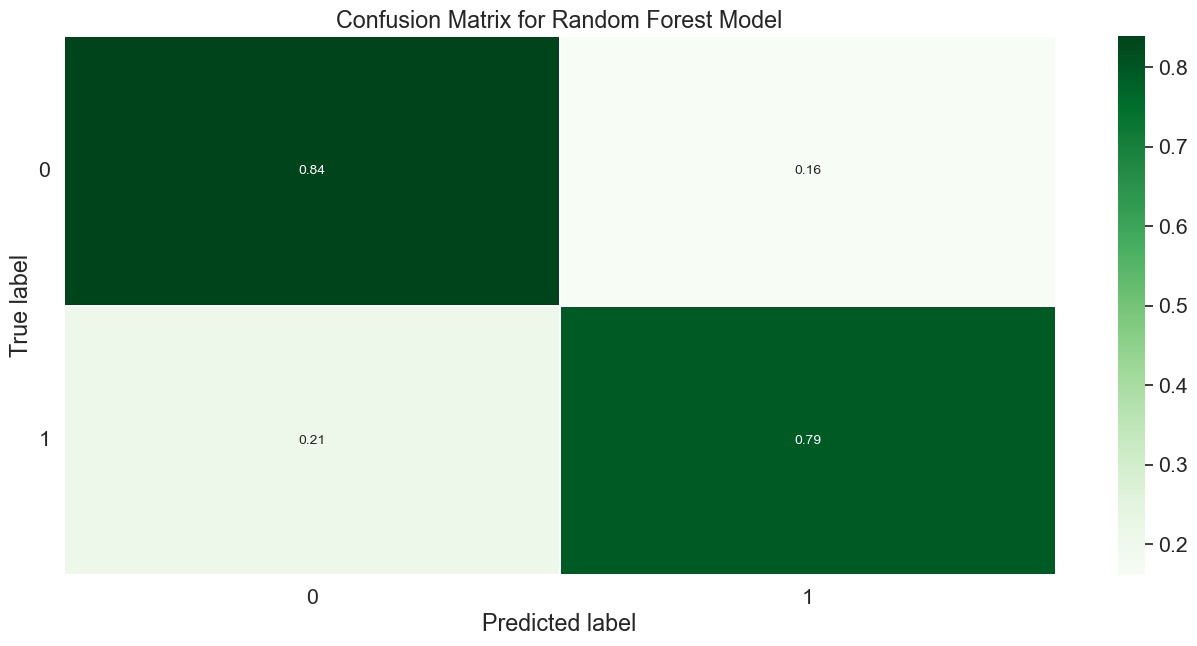

In [59]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['0', '1']
tick_marks = np.arange(len(class_names)) +0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

In [60]:
accuracy_score(y_test, y_pred)

0.8152418026650696

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      9941
           1       0.83      0.79      0.81     10096

    accuracy                           0.82     20037
   macro avg       0.82      0.82      0.82     20037
weighted avg       0.82      0.82      0.82     20037



In [46]:
#Parametri di tuning per la grid search esaustiva
tuning_params = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100],
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [47]:
grid_search = GridSearchCV(estimator = estimator, param_grid = tuning_params, 
                          cv = 3, verbose = 10)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 1/36] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.810 total time=  25.4s
[CV 2/3; 1/36] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 1/36] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.802 total time=  24.7s
[CV 3/3; 1/36] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 1/36] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, 

[CV 2/3; 9/36] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.804 total time=  20.1s
[CV 3/3; 9/36] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/3; 9/36] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.805 total time=  20.1s
[CV 1/3; 10/36] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100
[CV 1/3; 10/36] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.804 total time=  19.3s
[CV 2/3; 10/36] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100
[CV 2/3; 10/36] END boots

[CV 3/3; 17/36] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.810 total time=  22.6s
[CV 1/3; 18/36] START bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/3; 18/36] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.811 total time=  22.8s
[CV 2/3; 18/36] START bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/3; 18/36] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.807 total time=  22.9s
[CV 3/3; 18/36] START bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[C

[CV 1/3; 26/36] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.810 total time=  24.7s
[CV 2/3; 26/36] START bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/3; 26/36] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.808 total time=  24.4s
[CV 3/3; 26/36] START bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/3; 26/36] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.809 total time=  24.4s
[CV 1/3; 27/36] START bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100


[CV 2/3; 34/36] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.804 total time=  20.3s
[CV 3/3; 34/36] START bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100
[CV 3/3; 34/36] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100;, score=0.804 total time=  19.9s
[CV 1/3; 35/36] START bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=100
[CV 1/3; 35/36] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=100;, score=0.806 total time=  20.5s
[CV 2/3; 35/36] START bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=100
[

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             verbose=10)

In [48]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [54]:
best_classifier = RandomForestClassifier(n_estimators = 1000, bootstrap = True, criterion = 'entropy', max_depth = None,
                                         max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 10, verbose=3)
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
buildin

building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tre

building tree 639 of 1000
building tree 640 of 1000
building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tre

building tree 955 of 1000
building tree 956 of 1000
building tree 957 of 1000
building tree 958 of 1000
building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  7.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.3s finished


In [55]:
accuracy_score(y_test, y_pred)

0.8181863552428008

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

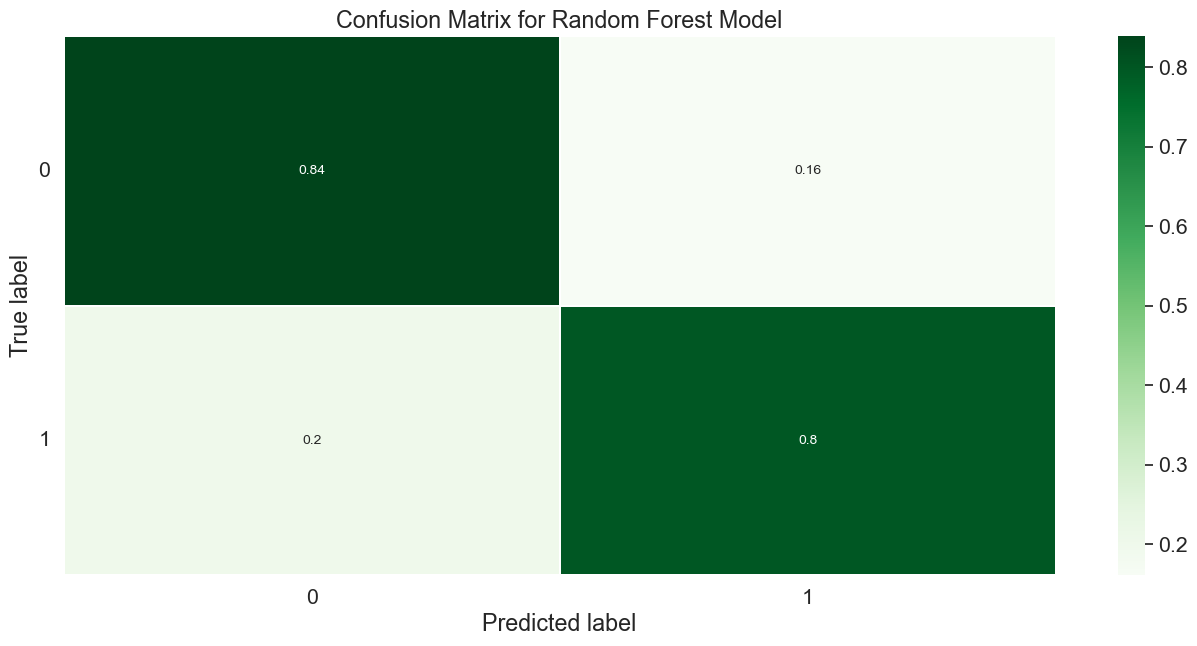

In [57]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['0', '1']
tick_marks = np.arange(len(class_names)) +0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')